# Session 02 - Chromosome $k$-mers <img src="data/JHI_STRAP_Web.png" style="width: 150px; float: right;"> 

## Learning Outcomes

* Read and manipulate prokaryotic genome sequences using [Biopython](https://www.biopython.org).
* Extract bulk genome properties from a genome sequence
* Visualisation of genome properties using Python
* Use of bulk genome properties to discriminate and identify organisms

## Introduction

### $k$-mers

Empirical frequencies of DNA $k$-mers in whole genome sequences provide an interesting perspective on genomic complexity, and the availability of large segments of genomic sequence from many organisms means that analysis of $k$-mers with non-trivial lengths is now possible, as can be seen in [Chor *et al.* (2009) *Genome Biol.* **10**:R108](http://dx.doi.org/10.1186/gb-2009-10-10-r108).

![k-mer spectra for a range of organisms](data/kmer_spectra.png "k-mer spectra for a range of organisms")

You will visualise the distribution of $k$-mer counts as spectra, as in the image above, using Python.

### Python code

We will use the [`Biopython`](http://www.biopython.org) libraries to interact with and manipulate sequence data, and the [`Pandas`](http://pandas.pydata.org/) data analysis libraries to manipulate numerical data.

Some code is imported from the local `bs32010` module in this directory, to avoid clutter in this notebook. You can inspect this module if you are interested.

In [1]:
%matplotlib inline
from Bio import SeqIO                 # For working with sequence data files
from Bio.Seq import Seq               # Seq object, needed for the last activity
from Bio.Alphabet import generic_dna  # sequence alphabet, for the last activity

from bs32010 import ex02              # Local functions and data

### Sequence data

Like Session 01, we will be dealing with sequence data directly, but there are again helper functions for this exercise, in the module `ex02`.

There is a dictionary stored in the variable `ex02.bact_files`. This provides a tuple of sequence file names, for any organism name in the list stored in `ex02.bacteria`.

You can see the contents of this list and dictionary with

```python
print(list(ex02.bacteria))
print(ex02.bact_files)
```

In [2]:
# Enter code here
print(list(ex02.bacteria))
print(ex02.bact_files)

['Mycobacterium tuberculosis', 'Mycoplasma pneumoniae', 'Nostoc punctiforme', 'Escherichia coli', 'Mycoplasma genitalium']
{'Mycobacterium tuberculosis': ('genome_data/gc_content/NC_016934.fna', 'genome_data/gc_content/NC_017523.fna', 'genome_data/gc_content/NC_022350.fna', 'genome_data/gc_content/NC_000962.fna'), 'Mycoplasma pneumoniae': ('genome_data/gc_content/NC_000912.fna', 'genome_data/gc_content/NC_016807.fna', 'genome_data/gc_content/NC_017504.fna', 'genome_data/gc_content/NC_020076.fna'), 'Mycoplasma genitalium': ('genome_data/gc_content/NC_018495.fna', 'genome_data/gc_content/NC_018496.fna', 'genome_data/gc_content/NC_018497.fna', 'genome_data/gc_content/NC_018498.fna'), 'Escherichia coli': ('genome_data/gc_content/NC_000913.fna', 'genome_data/gc_content/NC_002695.fna', 'genome_data/gc_content/NC_004431.fna', 'genome_data/gc_content/NC_010468.fna'), 'Nostoc punctiforme': ('genome_data/gc_content/NC_010628.fna',)}


To choose a particular organism, you can use the square bracket notation for dictionaries:

```python
print(ex02.bact_files['Mycobacterium tuberculosis'])
```

In [3]:
# Enter code here
print(ex02.bact_files['Mycobacterium tuberculosis'])

('genome_data/gc_content/NC_016934.fna', 'genome_data/gc_content/NC_017523.fna', 'genome_data/gc_content/NC_022350.fna', 'genome_data/gc_content/NC_000962.fna')


## 1. Counting $k$-mers

A function is provided in the `ex02` module to help you:

* `count_seq_kmers(inseq, k)`: this counts all subsequences of size $k$ in the sequence `inseq`

Test the function using the code below, which conducts the analysis for a *Pectobacterium* chromosome:

```python
inseq = SeqIO.read('genome_data/Pectobacterium/GCA_000769535.1.fasta', 'fasta')
kmer_count = ex02.count_seq_kmers(inseq, 6)
kmer_count.head()
```

The `Pandas` dataframe that is returned lets us use the `.head()` method to view the first few rows of the dataframe. This shows a column of six-character strings (the $k$-mers), with a second column showing the number of times that $k$-mer occurs in the genome.

In [5]:
# Enter code here
inseq = SeqIO.read('genome_data/Pectobacterium/GCA_000769535.1.fasta', 'fasta')
kmer_count = ex02.count_seq_kmers(inseq, 6)
kmer_count.head()

,frequency
GGCACT,1810
ATACTT,1293
CCAGAG,2379
GAGAGT,888
AGCTCC,1113


We can also inspect the `.shape` attribute to find out how large the returned results are, as this returns a `(rows, columns)` tuple, using the code below:

```python
kmer_count.shape
```

This tells us that there are 4096 distinct 6-mers in the sequence.

In [6]:
# Enter code here
kmer_count.shape

(4096, 1)

## 2. Plotting $k$-mer spectra

You can use the built-in `.hist()` method of `Pandas` dataframes, that will plot a histogram directly in this notebook. By default, this has quite a wide bin width, but this can be overridden with the `bins=n` argument, as with:

```python
kmer_count.hist(column='frequency', bins=100)
```

By default, the `.hist()` method will display the full range of data, but by specifying maximum and minimum values with the `range=(min, max)` argument, the extent of data displayed can be controlled.

Use the code below to visualise the 6-mer spectrum

```python
kmer_count.hist(column='frequency', bins=100, range=(0, 1000))
```

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108b4ca90>]], dtype=object)

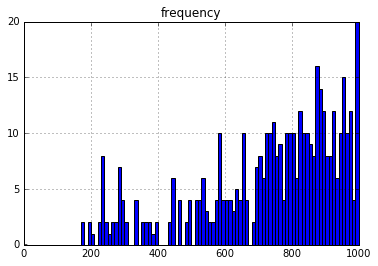

In [10]:
# Enter code here
kmer_count.hist(column='frequency', bins=100, range=(0, 1000))

*** Exercise 1 (10min): Recreate the plot in the upper left corner of the figure in the introduction, for one of the *E. coli* genomes. ***

* **HINT:** Use `print(ex02.bact_files['Escherichia coli'])` to get a list of *E.coli* chromosome files.

('genome_data/gc_content/NC_000913.fna', 'genome_data/gc_content/NC_002695.fna', 'genome_data/gc_content/NC_004431.fna', 'genome_data/gc_content/NC_010468.fna')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a1527b8>]], dtype=object)

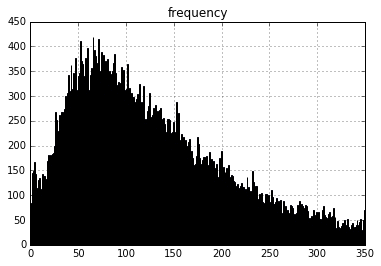

In [15]:
# Enter code here
print(ex02.bact_files['Escherichia coli'])
inseq = SeqIO.read('genome_data/gc_content/NC_000913.fna', 'fasta')
kmer_count = ex02.count_seq_kmers(inseq, 8)
kmer_count.head()
kmer_count.hist(column='frequency', bins=350, range=(0, 350))